# Astronomical Telescopes and Instruments 2020: Exercise Set 5
# Auke Bruinsma, s1594443

Welcome to the fifth exercise class for ATI 2020. You have to hand in the completed notebook to Brightspace before the start of the next lecture. Information/things to think about will be in regular font, while exercises will be *italic*.

### Make sure your submitted notebook works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'. There should be no errors!

*Upload the finished notebook to Brightspace before the start of the next lecture!*

These are the packages you need for this exercise set. You are welcome to add extra, but this should not be necessary.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

This set will focus on Mueller calculus, so we start by providing the Mueller matrices from the lecture:

In [23]:
def mueller_matrix_retarder(delta):
    '''
    Get the Mueller matrix for a linear retarder with 
    given retardance. The fast/slow axes are oriented
    along the +/- Q axes.
    
    Parameters
    ----------
    delta : scalar
        Retardance in radians.
    
    Returns
    -------
    M : 2darray
        Mueller matrix for the retarder.
    '''
    s = np.sin(delta)
    c = np.cos(delta)
    
    M = np.array([[1, 0, 0,  0],
                  [0, 1, 0,  0],
                  [0, 0, c, -s],
                  [0, 0, s,  c]])
    return M

def mueller_matrix_polarizer():
    '''
    Get the Mueller matrix for a horizontal polarizer.
    
    Returns
    -------
    M : 2darray
        Mueller matrix for the polarizer.
    '''
    M = 0.5 * np.array([[1,1,0,0],
                        [1,1,0,0],
                        [0,0,0,0],
                        [0,0,0,0]])
    
    return M

def mueller_matrix_mirror():
    '''
    Get the Mueller matrix for an ideal mirror at
    normal incidence.
    
    Returns
    -------
    M : 2darray
        Mueller matrix for a mirror.
    '''
    M = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0,-1, 0],
                  [0, 0, 0,-1]])
    
    return M

def mueller_matrix_rotation(theta):
    '''
    Get the rotation matrix for a Mueller matrix.
    
    Parameters
    ----------
    theta : scalar / ndarray
        Rotation angle(s) in radians.
    
    Returns
    -------
    R : ndarray
        Rotation matrix for Mueller matrices. If the 
        supplied angle is a scalar, then it will be 
        an array with shape (4,4). If the supplied 
        angles are an ndarray, it will have the shape
        (theta.shape, 4,4), so every angle is converted
        to a rotation matrix.
    '''
    theta = np.array(theta)
    
    # make sure everything has the same shape
    o = np.ones(theta.shape)
    z = np.zeros(theta.shape)
    
    s = np.sin(2*theta)
    c = np.cos(2*theta)
    
    # build rotation matrices
    R = np.array([[o,  z, z, z],
                  [z,  c, s, z],
                  [z, -s, c, z],
                  [z,  z, z, o]])
    
    # change location of axes to get the output shape
    R = np.einsum('ij...->...ij', R)
    
    return R

### Exercise 1: Rotating Retarder Polarimeter

In this exercise we will look at a simple polarimeter, consisting of a rotating linear retarder, followed by a fixed linear polarizer and finally the detector. The retardance of the retarder will be $\delta$ and the rotation angle of the retarder will be $\theta(t)$. 

*Write a function that calculates the Mueller matrix for the retarder/polarizer system, which takes as input the rotation angle $\theta$ and retardance $\delta$.*

If you're clever with how you write this function, you can let it accept an array of $\theta$ values and let it output a stack of matrices (ndarray), one for each $\theta$ (see https://numpy.org/doc/stable/reference/generated/numpy.matmul.html). As a shorthand for matrix multiplication you can also use the '@' symbol, as explained in https://www.python.org/dev/peps/pep-0465/. This isn't required though, so don't worry if you can't get that to work.

**Answer**:
Just as Jones' matrices, Mueller matrices can be multiplied. The first element is at the end, and the last at the beginning of the matrix multiplication.

Sequence of elements in the polarimater:
1. Signal $S$
2. Rotating linear retarded
        mueller_matrix_rotation, $M_{rot_1}$
        mueller_matrix_retarder, $M_{retard}$
        mueller_matrix_rotation, $M_{rot_2}$
3. Fixed linear polarizer 
        mueller_matrix_polarizer, $M_{pol}$
4. Detector

In [24]:
def mueller_matrix_system(theta, delta):
    '''
    Compute the signal of the polarimeter system.
    
    Parameters
    ----------
    signal : ndarray
        Stokes vector
    theta : scalar / ndarray
        Rotation angle(s) in radians.
    delta : scalar
        Retardance in radians.
    
    Returns
    -------
    Signal : ndarray
        The signal which is a 4x4 array
        and contains the signal after
        it went throught the polarimeter
        system.
    '''
    
    # Compute all elements.
    M_pol = mueller_matrix_polarizer()
    M_rot_1 = mueller_matrix_rotation(theta)
    M_rot_2 = mueller_matrix_rotation(-1*theta)
    M_retard = mueller_matrix_retarder(delta)
    
    # Multiplication of the Mueller matrices.
    step_1 = np.matmul(M_retard, M_rot_1)
    step_2 = np.matmul(M_rot_2, step_1)
    final_step = np.matmul(M_pol, step_2)
    
    # Return matrix/matrices.
    return final_step

*Set $\delta=\pi/4$. In the same plot, plot the detector signal for the following four input signals as a function of $0\leq\theta\leq2\pi$:*

1. *An unpolarized beam*
2. *A horizontally polarized beam*
3. *A diagonally polarized beam ($+U$)*
4. *A circularly polarized beam ($+V$)*

Hint: a detector only measures intensity.

**Answer**

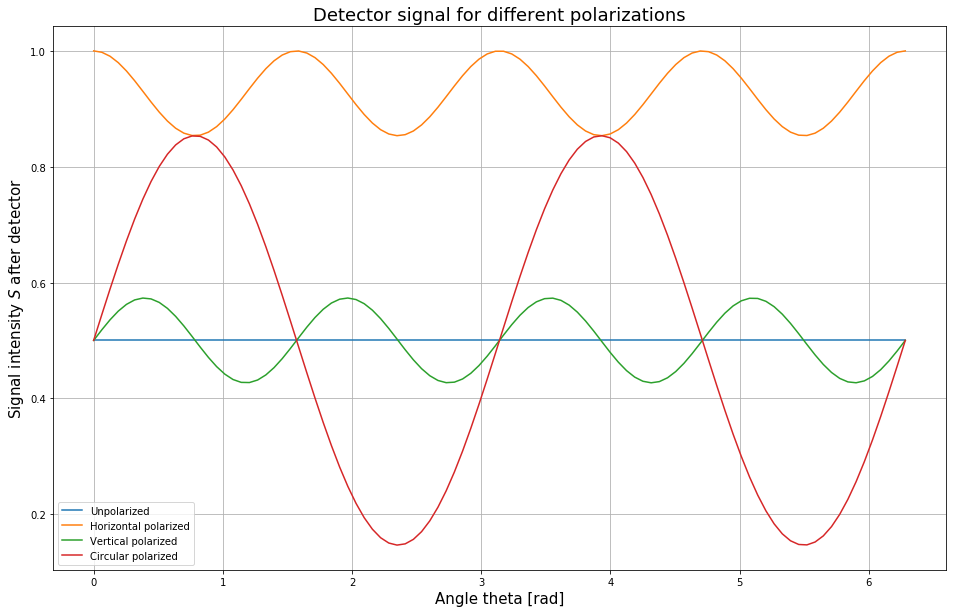

In [25]:
# Setting up the parameter values.
delta = np.pi/4
theta = np.linspace(0, 2*np.pi, 100)

# Setting up the Stokes vectors for the 4 different input signals.
unpol   = np.array([[1], [0], [0], [0]])
hor_pol = np.array([[1], [1], [0], [0]])
dig_pol = np.array([[1], [0], [1], [0]])
cir_pol = np.array([[1], [0], [0], [1]])
pol_arr = [unpol, hor_pol, dig_pol, cir_pol]

# String array for when looping through the stokes vectors.
string_array = ['Unpolarized', 'Horizontal polarized', 'Vertical polarized', 'Circular polarized']

# Computation of the mueller matrix system (The same for different stokes vectors since the multiplication ...
# ... of the vector and the matrices in done as last.)
result = mueller_matrix_system(theta, delta)

# Setting up the plot.
plt.figure(figsize=(16,10))

# Going through all the different Stokes vectors.
for i in range(len(pol_arr)):
    
    signal = [] # Will contain the signal.
    intensity = [] # Will contains the intensity of the signal.
    
    for j in range(len(theta)):
        signal.append(np.matmul(result[j], pol_arr[i])) # Multiplication Stokes vector and Mueller matrix.
        intensity.append(signal[j][0][0]) # Only take the first elements since ...
        # ... that one contains the intensity value.
    
    plt.plot(theta, intensity, label=f'{string_array[i]}')

plt.title('Detector signal for different polarizations', fontsize=18)
plt.xlabel('Angle theta [rad]', fontsize=15)
plt.ylabel('Signal intensity $S$ after detector', fontsize=15)
    
plt.grid()
plt.legend()
plt.show()

You should be able to see that for $\delta=\pi/4$ the modulation for circularly polarized light has a pretty large amplitude, but those for linearly polarized light have way smaller amplitudes. We can improve this by tuning $\delta$.

The analytical result for this system is:

$$I' = \frac{1}{2}\left(I + \frac{Q}{2}[(1+\cos{(\delta)}) + (1-\cos{(\delta)})\cos{(4\theta)}] + \frac{U}{2}(1-\cos{(\delta)})\sin{(4\theta)} - V\sin{(\delta)}\sin{(2\theta)}\right)$$

*Show that for $\delta\approx127^\circ$ the modulation amplitudes of $Q$, $U$, and $V$ are identical.*

There is a closed expression for the exact $\delta$ for which this happens, can you find it?

**Answer**

Splitting the equation into the parts of $Q$, $U$, and $V$ gives:

$$ \frac{Q}{2}[(1+\cos{(\delta)}) + (1-\cos{(\delta)})\cos{(4\theta)}] $$

$$ \frac{U}{2}(1-\cos{(\delta)})\sin{(4\theta)} $$

$$ - V\sin{(\delta)}\sin{(2\theta)} $$

Since the first term of the $Q$ part only contains $\delta$ and not $\theta$, this term is not relevant for the modulation amplitude, since it does not contain a modulation in $\theta$. So the terms becomes

$$ \frac{Q}{2}(1-\cos{\delta})\cos{4\theta} $$

$$ \frac{U}{2}(1-\cos{(\delta)})\sin{(4\theta)} $$

$$ - V\sin{(\delta)}\sin{(2\theta)} $$

Now, when is the amplitude of the modulations of $Q$, $U$ and $V$ equal to each other? Substituting the $1 - \cos \delta $ with $ 2 \sin \delta $ gives:

$$ \frac{Q}{2}(2 \sin\delta)\cos{4\theta} $$

$$ \frac{U}{2}(2 \sin\delta)\sin{4\theta} $$

$$ - V\sin{\delta}\sin{2\theta} $$

Working this out further gives:

$$ Q \sin \delta \cos{4\theta} $$

$$ U \sin \delta \sin{4\theta} $$

$$ - V\sin{\delta}\sin{2\theta} $$

You can see that all terms now have the same amplitude.

Solving the substitution gives:

$$ 1 - \cos \delta = 2 \sin\delta $$

$$ \delta = 2.2143 \text{ rad} $$

*Make the same plot as above, but now set $\delta=127^\circ$ (or the exact value of $\delta$ if you found it).*

**Answer**

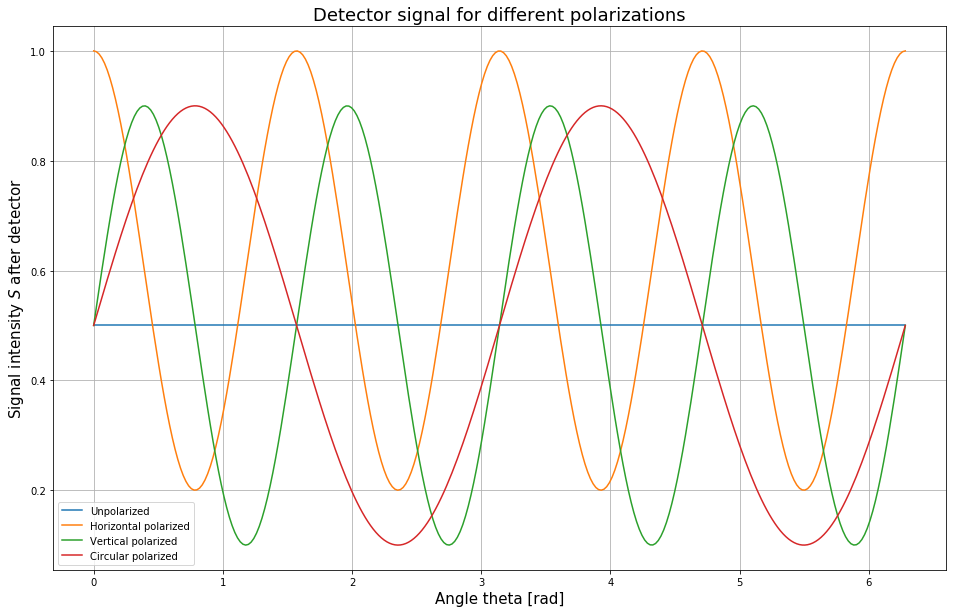

In [26]:
# Setting up the parameter values.
delta = 2.2143
theta = np.linspace(0, 2*np.pi, 300)

# Setting up the Stokes vectors for the 4 different input signals.
unpol   = np.array([[1], [0], [0], [0]])
hor_pol = np.array([[1], [1], [0], [0]])
dig_pol = np.array([[1], [0], [1], [0]])
cir_pol = np.array([[1], [0], [0], [1]])
pol_arr = [unpol, hor_pol, dig_pol, cir_pol]

# String array for when looping through the stokes vectors.
string_array = ['Unpolarized', 'Horizontal polarized', 'Vertical polarized', 'Circular polarized']

# Computation of the mueller matrix system (The same for different stokes vectors since the multiplication ...
# ... of the vector and the matrices in done as last.)
result = mueller_matrix_system(theta, delta)

# Setting up the plot.
plt.figure(figsize=(16,10))

# Going through all the different Stokes vectors.
for i in range(len(pol_arr)):
    
    signal = [] # Will contain the signal.
    intensity = [] # Will contains the intensity of the signal.
    
    for j in range(len(theta)):
        signal.append(np.matmul(result[j], pol_arr[i])) # Multiplication Stokes vector and Mueller matrix.
        intensity.append(signal[j][0][0]) # Only take the first elements since ...
        # ... that one contains the intensity value.
    
    plt.plot(theta, intensity, label=f'{string_array[i]}')

plt.title('Detector signal for different polarizations', fontsize=18)
plt.xlabel('Angle theta [rad]', fontsize=15)
plt.ylabel('Signal intensity $S$ after detector', fontsize=15)
    
plt.grid()
plt.legend()
plt.show()

The plots you made above show what happens at any instantaneous angle $\theta$. If we were to implement this design for a polarimeter we would have a finite exposure time, while the angle $\theta$ continuously changes as a function of time. Our measured signal $C$ will therefore be proportional to:

$$C \sim \int_{T_0}^{T_1} {I'(\theta(t),\delta)\ \text{d}t }$$

Assume that the detector measures $C$ in $n$ equally long time intervals for every full rotation of the retarder. 

*How large does $n$ need to be to be able to reconstruct all components of the incoming Stokes vector? Why this size?*

**Answer**

The same question formulated in another way is 'Argue what the smallest possible value for $n$ is to reconstruct all components of the incoming Stokes vector'.

First I am going to take a look at the phases of the different Stokes vectors.

| Stokes vector | Phase in the range of $0$ to $2\pi$ | 1 cycle | Angle between minimum and maximum | 
|---|---|---|---|
| Unpolarized | - | - | - |
| Horizontal polarized | 4 | $0.5\pi$ | $0.25\pi$ |
| Vertical polarized | 4 | $0.5\pi$ | $0.25\pi$ |
| Circular polarized | 2 | $1\pi$ | $0.5\pi$ |



So, smallest distance between the minimum and maximum in this graph is in the horizontal polarized and vertical polarized beam, there it is equal to $0.25 \pi$ or 45 degrees. This means that the angle between two detector measurements must also be at least 45 degrees.

$$ n = \frac{360 \text{ degrees}}{45 \text{ degrees}} = 8 $$

So the smallest possible value for $n$ is 8.

Now we will check whether your answer above works.

An obvious choice for the rotation angle as a function of time is $\theta(t)=2\pi t/T$ for some $T$. In that case the above integral is easy to evaluate. The function below will give you the resulting values of $C$:

In [27]:
def measured_signals_model(stokes_in, n, T, delta):
    '''
    Calculate the detector signals for a linearly
    changing angle for the retarder, when a full rotation
    of the retarder is divided into a number of detection
    sub-intervals.
    
    Parameters
    ----------
    stokes_in : 1darray
        Input Stokes vector.
    n : integer
        Number of measurement sub-intervals.
    T : scalar
        Period of a full rotation of the retarder.
    delta : scalar
        Retardance of the retarder.
        
    Returns
    -------
    C : 1darray
        Array of length n, which contains the detector signal
        per sub-interval.
    '''
    
    I, Q, U, V = stokes_in
    
    def I_anti_derivative(t):
        '''
        Calculate the anti-derivative of the instantaneous intensity.
        '''
        o = 2*np.pi/T
        
        Ii =  I/2 * t
        Qi =  Q/4 * ((1+np.cos(delta))*t + (1-np.cos(delta))*np.sin(4*o*t)/(4*o))
        Ui = -U/4 * (1-np.cos(delta)) * np.cos(4*o*t)/(4*o)
        Vi =  V/2 * np.sin(delta) * np.cos(2*o*t)/(2*o)
        
        return Ii + Qi + Ui + Vi
    
    interval_times = np.linspace(0, T, int(n)+1)
    
    # evaluate anti-derivative at all boundaries
    integrated_signals = I_anti_derivative(interval_times)
    
    # get the integrals by taking differences at boundaries
    C = np.roll(integrated_signals, -1) - integrated_signals
    
    return C[:-1]

def fit_function(x, I, Q, U, V):
    '''
    A wrapper for 'measured_signals_model' which
    works with scipy's 'curve_fit' routine.
    '''
    n, T, delta = x
    return measured_signals_model([I,Q,U,V], n, T, delta)

Set $\delta=127^\circ$.

*Generate 200 Stokes vectors with uniformly random $I, Q, U, V$, normalize them, and fit the measured detector signals with scipy's 'curve_fit' routine. Find the average reconstruction error for your chosen $n$. Is this an acceptable error in a noiseless simulation?*

Remember that you must have $I^2 \geq Q^2 + U^2 + V^2$. Partially polarized light is okay, but the polarization components cannot exceed $I$. 

In [28]:
import random as rd

def generate_stokes_vectors():
    num_vec = 200
    stokes_vectors = []

    for i in range(num_vec):
        # First generate Q, U and V.
        Q = rd.uniform(-1,1)
        U = rd.uniform(-1,1)
        V = rd.uniform(-1,1)

        # Determine the sum of the squares
        lower_limit = Q**2 + U**2 + V**2

        # Generate I so that it will always be larger than the lower limit.
        I = rd.uniform(lower_limit, lower_limit + 1)
        if bool(rd.getrandbits(1)):
            I = rd.uniform(-1*lower_limit, lower_limit - 1)

        # Determine the sum of the 4 components and normalize them.
        S = np.sqrt(Q**2 + U**2 + V**2 + I**2)
        Q /= S; U /= S; V /= S; I /= S
        
        stokes_vectors.append([I, Q, U, V])
    
    return stokes_vectors

In [29]:
n = 8
T = 2*np.pi
delta = np.deg2rad(127)
stokes_vectors = generate_stokes_vectors()
#print(stokes_vectors)

measured_signal_arr = []
for stoke_vector in stokes_vectors:
    measured_signal = fit_function([n, T, delta], stoke_vector[0], stoke_vector[1], stoke_vector[2], stoke_vector[3])
    #print(measured_signal)
    measured_signal_arr.append(measured_signal)

I don't really know how to do this exercise.

### Exercise 2: Rotating Mirror

In this exercise we'll examine something that seems simple enough, just a mirror, but it will test your understanding of the Mueller matrix formalism.

*Plot the four diagonal elements of the Mueller matrix for a mirror rotated by an angle $0\leq \theta \leq 2\pi$ around its normal.*

**Answer**:
I apply the rotating Mueller matrix to the mirror matrix, so I can get the plots for the angle of 0 to 2$\pi$.

In [30]:
def rot_mirror(theta):
    M_mir = mueller_matrix_mirror()
    M_rot_1 = mueller_matrix_rotation(theta)
    M_rot_2 = mueller_matrix_rotation(-1*theta)
    
    part_1 = np.matmul(M_mir, M_rot_1)
    result = np.matmul(M_rot_2, part_1)
    
    return result

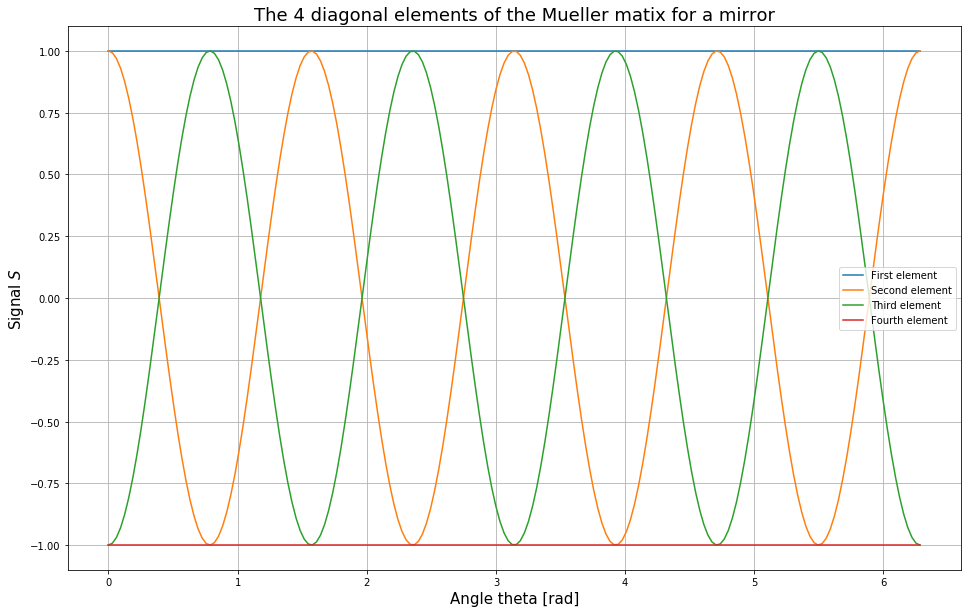

In [31]:
theta = np.linspace(0, 2*np.pi, 200)

plt.figure(figsize=(16,10))

RM = rot_mirror(theta)

plt.plot(theta, RM[:,0,0], label = 'First element')
plt.plot(theta, RM[:,1,1], label = 'Second element')
plt.plot(theta, RM[:,2,2], label = 'Third element')
plt.plot(theta, RM[:,3,3], label = 'Fourth element')

plt.title('The 4 diagonal elements of the Mueller matix for a mirror', fontsize=18)
plt.xlabel('Angle theta [rad]', fontsize=15)
plt.ylabel('Signal $S$', fontsize=15)
    
plt.grid()
plt.legend()
plt.show()

*What is wrong with the figure you generated above? Why is it wrong?*

**Answer**:
Since the Mueller mirror matrix is a mirror, it is strange that different signals arise for different angles. It is a mirror, so the signal must be independent of income angle, and the rotated mirror should always have the same value as the non-rotated mirror. So actually you're not allowed to apply the rotation matrix to the mirror matrix.

If you have correctly identified the problem and its origin, it's pretty easy to fix.

*Plot the diagonal elements for the correctly rotated mirror as a function of $0\leq\theta\leq2\pi$.*

**Answer**:
Based on my argument above, I'd say the plot becomes:

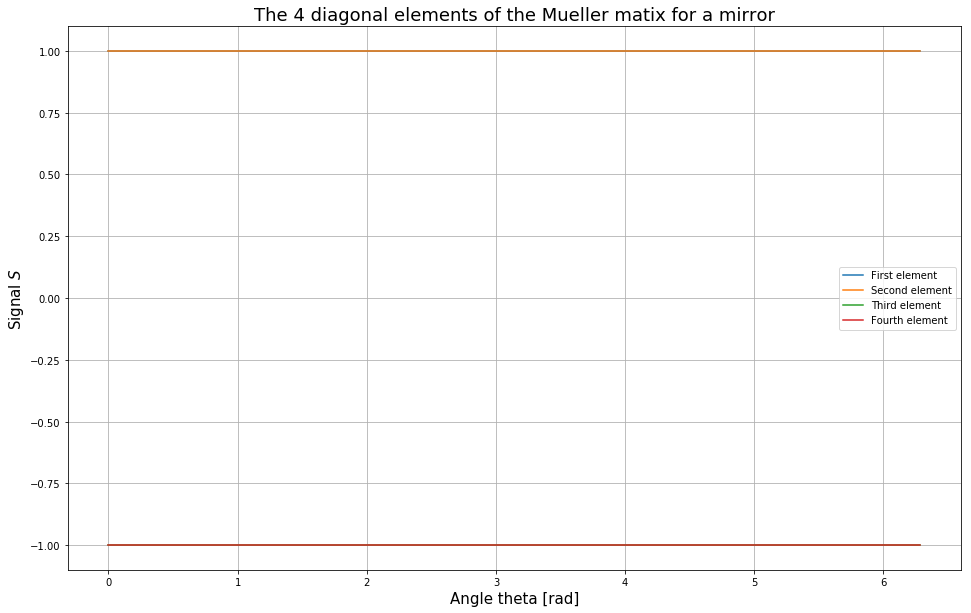

In [32]:
theta = np.linspace(0, 2*np.pi, 200)

plt.figure(figsize=(16,10))

MM = mueller_matrix_mirror()

MM_arr_0 = np.linspace(MM[0][0],MM[0][0],len(theta))
MM_arr_1 = np.linspace(MM[1][1],MM[1][1],len(theta))
MM_arr_2 = np.linspace(MM[2][2],MM[2][2],len(theta))
MM_arr_3 = np.linspace(MM[3][3],MM[3][3],len(theta))

plt.plot(theta, MM_arr_0, label = 'First element')
plt.plot(theta, MM_arr_1, label = 'Second element')
plt.plot(theta, MM_arr_2, label = 'Third element')
plt.plot(theta, MM_arr_3, label = 'Fourth element')

plt.title('The 4 diagonal elements of the Mueller matix for a mirror', fontsize=18)
plt.xlabel('Angle theta [rad]', fontsize=15)
plt.ylabel('Signal $S$', fontsize=15)
    
plt.grid()
plt.legend()
plt.show()

### Make sure your submitted notebook works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'. There should be no errors!

*Upload the finished notebook to Brightspace before the start of the next lecture!*